In [3]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def fitness(individual):
    horizontal_collisions = sum([individual.count(queen) - 1 for queen in individual]) // 2
    diagonal_collisions = 0

    for i in range(len(individual)):
        for j in range(i + 1, len(individual)):
            if i - individual[i] == j - individual[j] or i + individual[i] == j + individual[j]:
                diagonal_collisions += 1

    return max(0, len(individual) - (horizontal_collisions + diagonal_collisions))

def create_individual(n):
    return [random.randint(0, n - 1) for _ in range(n)]

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(individual):
    index = random.randint(0, len(individual) - 1)
    individual[index] = random.randint(0, len(individual) - 1)
    return individual

def selection(population, fitnesses, k=3):
    selected_indices = random.sample(range(len(population)), k)
    selected_fitnesses = [fitnesses[i] for i in selected_indices]
    best_index = selected_indices[selected_fitnesses.index(max(selected_fitnesses))]
    return population[best_index]

def n_queens_genetic_algorithm(n, population_size=100, generations=100, crossover_prob=0.8, mutation_prob=0.2):
    population = [create_individual(n) for _ in range(population_size)]
    fitnesses = [fitness(individual) for individual in population]

    for gen in range(generations):
        new_population = []

        for _ in range(population_size // 2):
            parent1 = selection(population, fitnesses)
            parent2 = selection(population, fitnesses)

            if random.random() < crossover_prob:
                child1, child2 = crossover(parent1, parent2)
            else:
                child1, child2 = parent1, parent2

            if random.random() < mutation_prob:
                child1 = mutate(child1)

            if random.random() < mutation_prob:
                child2 = mutate(child2)

            new_population.append(child1)
            new_population.append(child2)

        population = new_population
        fitnesses = [fitness(individual) for individual in population]

        best_individual = population[fitnesses.index(max(fitnesses))]
        best_fitness = max(fitnesses)

        if best_fitness == n:
            break

    return best_individual

Solution: [3, 1, 7, 5, 0, 2, 4, 6]
Fitness: 8


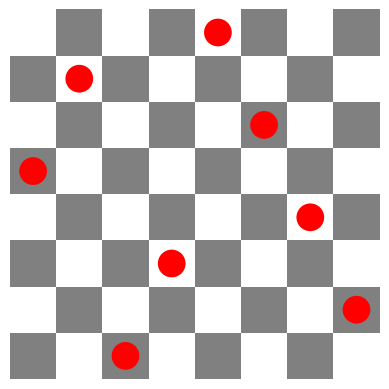

In [4]:
def visualize_solution(solution):
    n = len(solution)
    fig, ax = plt.subplots()
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                color = 'white'
            else:
                color = 'gray'
            ax.add_patch(patches.Rectangle((i, j), 1, 1, facecolor=color))

    for i, j in enumerate(solution):
        ax.add_patch(patches.Circle((i + 0.5, j + 0.5), 0.3, facecolor='red'))

    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    n = 8
    solution = n_queens_genetic_algorithm(n)
    print("Solution:", solution)
    print("Fitness:", fitness(solution))
    visualize_solution(solution)